<body>
    <p style="font-size:28px;text-align:center"><b>Project 04 | Linear Regression</b></p>
</body>

# Introduction

The objective of this project was to create a **model to predict prices of diamonds** that achieves a specific goal, practicing linear regression. 

The model will be create from a dataset with information about 49,000 diamonds. 

---

<body>
    <p style="font-size:20px"><b>Goal</b></p>
</body>

_Average error not greater than $900._

---

<body>
    <p style="font-size:20px"><b>Evaluation</b></p>
</body>

In order to evaluate the model, two main sources will be used:

1. A dataset with information about **Rick's diamonds**
2. A **website** that calculates the **Coefficient of Determination** (**R²**) and the **Root Mean Squared Error** (**RMSE**) was used.

# Diamonds

It is necessary to understand the factors that influence the price of diamonds, so they can be predicted. The table below show the factors (columns of the dataframe) and a brief description about them.

| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

# Setup

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import iqr
from sklearn.linear_model import LinearRegression

## Historical Dataset

### Import

In [2]:
# Import the dataset
diamonds_history = pd.read_csv('00-diamonds.csv')

# Check the result
diamonds_history.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [3]:
# Check the shape of the dataframe
diamonds_history.shape
print(f'This dataset has {diamonds_history.shape[0]} rows and {diamonds_history.shape[1]} columns.')

This dataset has 48940 rows and 10 columns.


### Backup

In [4]:
# Backup original dataset
raw_diamond_history = diamonds_history.copy()

## Rick's Dataset

### Import

In [5]:
# Import Rick's dataset
rick_diamonds = pd.read_csv('00-rick_diamonds.csv')

# Check the result
rick_diamonds.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18


In [6]:
# Check the shape of the dataframe
diamonds_history.shape
print(f'This dataset has {rick_diamonds.shape[0]} rows and {rick_diamonds.shape[1]} columns.')

This dataset has 5000 rows and 9 columns.


### Backup

In [7]:
# Backup original dataset
raw_rick_diamonds = rick_diamonds.copy()

# Baseline

Initially, a baseline model will be created for initial evaluation. It was be based on the **raw dataset `diamonds_history`**.

## Check the Base Dataset

In [8]:
# Check the data statistics summary
diamonds_history.describe()

,carat,depth,table,price,x,y,z
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
# Check missing values
diamonds_history.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Create the Baseline Model

The baseline model will be based on the **mean of the prices** in the base dataset.

In [10]:
# Calculate the mean price for the original dataset
raw_mean_price = raw_diamond_history.price.mean()
raw_mean_price

3934.409644462607

In [11]:
# Create the baseline model
baseline_price = rick_diamonds.copy()
baseline_price['price_predicted'] = raw_mean_price
baseline_price

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3934.409644
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,3934.409644
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,3934.409644
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,3934.409644
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,3934.409644
...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,3934.409644
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,3934.409644
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,3934.409644
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,3934.409644


## Export the Result

In [12]:
# Export the dataset
baseline_price.to_csv('LG-baseline_model-0.csv', index=False)

## Metric

RMSE = 3969

# Exploratory Data Analysis (EDA)

In [13]:
# Check metada of the base dataset
diamonds_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    48940 non-null  float64
 1   cut      48940 non-null  object 
 2   color    48940 non-null  object 
 3   clarity  48940 non-null  object 
 4   depth    48940 non-null  float64
 5   table    48940 non-null  float64
 6   price    48940 non-null  int64  
 7   x        48940 non-null  float64
 8   y        48940 non-null  float64
 9   z        48940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.7+ MB


There are 3 categorical variables (`cut`, `color` and `clarity`) and their values will be converted to numbers.

## Convert categorical variables

### Historical Dataset

#### Cut

In [14]:
# Check unique values
diamonds_history['cut'].unique()

array(['Premium', 'Good', 'Very Good', 'Ideal', 'Fair'], dtype=object)

In [15]:
# Create dictionary with the categories and their respective number
cut_num = {'Fair': '1', 'Good': '2', 'Very Good': '3', 'Premium': '4', 'Ideal': '5'}

# Create a new column in the dataset for the conversion result
diamonds_history['cut_num'] = diamonds_history['cut'].apply(lambda x : int(x.replace(x, cut_num[x])))

# Check the result
diamonds_history

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,3
...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,4
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,5
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3


#### Color

In [16]:
# Check unique values
list(diamonds_history['color'].unique())

['E', 'I', 'J', 'H', 'F', 'G', 'D']

In [17]:
# Create a list with the unique values and sort it
color_cat = list(diamonds_history['color'].unique())
color_cat.sort(reverse=True)

# Check the result
color_cat

['J', 'I', 'H', 'G', 'F', 'E', 'D']

In [18]:
# Create dictionary with the categories and their respective number
color_cat_num = {letter: str(index + 1) for index, letter in enumerate(color_cat)}

# Check the result
color_cat_num

{'J': '1', 'I': '2', 'H': '3', 'G': '4', 'F': '5', 'E': '6', 'D': '7'}

In [19]:
# Create a new column in the dataset for the conversion result
diamonds_history['color_num'] = diamonds_history['color'].apply(lambda x : int(x.replace(x, color_cat_num[x])))

# Check the result
diamonds_history

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,6
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,6
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,2
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,1
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,4,7
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,5,7
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2,7
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3,7


#### Clarity

In [20]:
# Create dictionary with the categories and their respective number
clarity_cat = {'I1': '1', 'SI2': '2', 'SI1': '3', 'VS2': '4', 'VS1': '5', 'VVS2': '6', 'VVS1': '7', 'IF': '8'}

# Create a new column in the dataset for the conversion result
diamonds_history['clarity_num'] = diamonds_history['clarity'].apply(lambda x : int(x.replace(x, clarity_cat[x])))

# Check the result
diamonds_history

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,clarity_num
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,6,3
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,6,5
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,2,4
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,1,2
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,3,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,4,7,3
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,5,7,3
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2,7,3
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3,7,3


### Rick's Dataset

#### Cut

In [21]:
# Create a new column in the dataset for the conversion result
rick_diamonds['cut_num'] = rick_diamonds['cut'].apply(lambda x : int(x.replace(x, cut_num[x])))

# Check the result
rick_diamonds

,carat,cut,color,clarity,depth,table,x,y,z,cut_num
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,2
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,5
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,5
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,5
...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,3
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,5
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,3
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,5


#### Color

In [22]:
# Create a new column in the dataset for the conversion result
rick_diamonds['color_num'] = rick_diamonds['color'].apply(lambda x : int(x.replace(x, color_cat_num[x])))

# Check the result
rick_diamonds

,carat,cut,color,clarity,depth,table,x,y,z,cut_num,color_num
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3,3
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,2,5
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,5,3
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,5,4
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,5,4
...,...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,3,7
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,5,5
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,3,5
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,5,5


#### Clarity

In [23]:
# Create a new column in the dataset for the conversion result
rick_diamonds['clarity_num'] = rick_diamonds['clarity'].apply(lambda x : int(x.replace(x, clarity_cat[x])))

# Check the result
rick_diamonds

,carat,cut,color,clarity,depth,table,x,y,z,cut_num,color_num,clarity_num
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3,3,2
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,2,5,4
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,5,3,4
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,5,4,5
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,5,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,3,7,2
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,5,5,6
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,3,5,3
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,5,5,7


# First Linear Regression Model

In [24]:
# Instance the model
model = LinearRegression()

X = diamonds_history[['carat', 'cut_num', 'color_num', 'clarity_num', 'depth', 'table', 'x', 'y', 'z']]
y = diamonds_history['price']

# Performe the model
model.fit(X, y)

# Predict
rick_predicted = model.predict(rick_diamonds[['carat', 'cut_num', 'color_num', 'clarity_num', 'depth', 'table', 'x',
                                              'y', 'z']])

# Create a new dataset
rick_final = raw_rick_diamonds.copy()
rick_final['price_predicted'] = rick_predicted
rick_final

# Export the dataset
rick_final.to_csv('LG-price-predicted.csv', index=False)

In [25]:
# Check the result
rick_final

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3109.119038
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,302.781636
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,1090.429022
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,6944.243982
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,16556.595766
...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,-525.391618
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,2710.330565
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,5252.165987
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,1678.771809


# Metric

> RMSE = 1230

> R² = 90.40%

Since the metrics for this model was better than the one for the baseline, this model will be **accepted** and become the new baseline.

# Exploratory Data Analysis (EDA)

## Relevant Variables

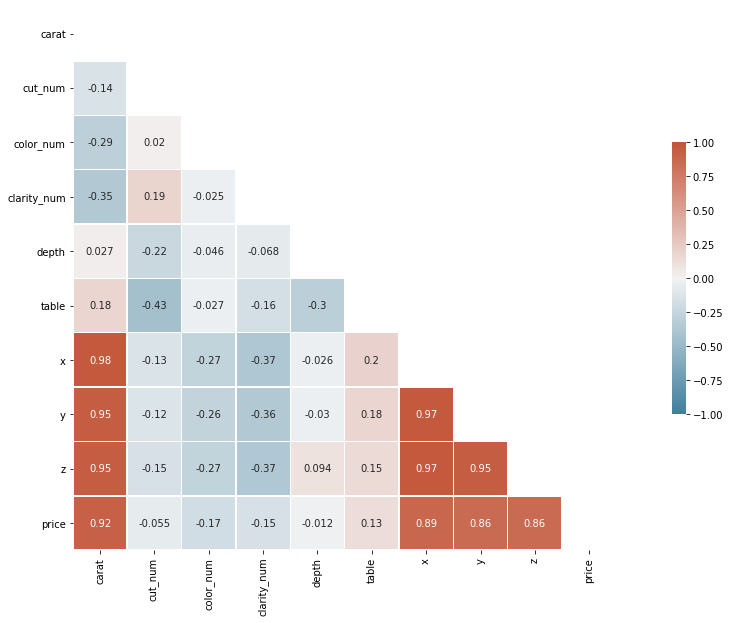

In [26]:
# Check the correlation between the variables

# Correlation
corr = diamonds_history[['carat', 'cut_num', 'color_num', 'clarity_num', 'depth', 'table', 'x', 'y', 'z', 'price']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Plot the heatmap
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

From the heatmap above, the following insights were obtained:
- The variables that influence the most `price`: `carat`, `x`, `y` and `z`
- The least relevant variable: `depth`
  - So, using the `depth` in the analysis is irrelevant if the `x`, `y` and `z` are being used, since the `depth`depends on those 3

# Testing Variables with Different Models

## Using `carat`, ` x`, ` y` and `z`

### Linear Regression Model

In [27]:
# Instance the model
model = LinearRegression()

X = diamonds_history[['carat', 'x', 'y', 'z']]
y = diamonds_history['price']

# Performe the model
model.fit(X, y)

# Predict
rick_predicted = model.predict(rick_diamonds[['carat', 'x', 'y', 'z']])

# Create a new dataset
rick_final = raw_rick_diamonds.copy()
rick_final['price_predicted'] = rick_predicted
rick_final

# Export the dataset
rick_final.to_csv('LG-price-predicted.csv', index=False)

### Metric

> RMSE = 1538

Since the metric for the first model was better than this, this model was **rejected**.

## Using all variables, except `depth`

### Linear Regression Model

In [28]:
# Instance the model
model = LinearRegression()

X = diamonds_history[['carat', 'cut_num', 'color_num', 'clarity_num', 'table', 'x', 'y', 'z']]
y = diamonds_history['price']

# Performe the model
model.fit(X, y)

# Predict
rick_predicted = model.predict(rick_diamonds[['carat', 'cut_num', 'color_num', 'clarity_num', 'table', 'x', 'y', 'z']])

# Create a new dataset
rick_final = raw_rick_diamonds.copy()
rick_final['price_predicted'] = rick_predicted
rick_final

# Export the dataset
rick_final.to_csv('LG-price-predicted.csv', index=False)

### Metric

> RMSE = 1232

> R² = 90.36%

Just removing the variable `depth` from the analysis did not change much the result from the first model.

## Using all variables, except `x`, ` y` and `z`

### Linear Regression Model

In [29]:
# Instance the model
model = LinearRegression()

X = diamonds_history[['carat', 'cut_num', 'color_num', 'clarity_num', 'depth', 'table']]
y = diamonds_history['price']

# Performe the model
model.fit(X, y)

# Predict
rick_predicted = model.predict(rick_diamonds[['carat', 'cut_num', 'color_num', 'clarity_num', 'depth', 'table']])

# Create a new dataset
rick_final = raw_rick_diamonds.copy()
rick_final['price_predicted'] = rick_predicted
rick_final

# Export the dataset
rick_final.to_csv('LG-price-predicted.csv', index=False)

### Metric

> RMSE = 1247

> R² = 90.17%

This result was worse than the one from the model above. Since using `depth` and `x`, `y` and `z` is redundant. This model will be **rejected**, and the model above will be the new baseline.

# Exploratory Data Analysis (EDA

## Values and Outliers

In [30]:
# Check the dataset statistics summary
diamonds_history.describe()

,carat,depth,table,price,x,y,z,cut_num,color_num,clarity_num
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648,3.906416,4.407254,4.055456
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817,1.116568,1.699858,1.645542
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,3.000000,3.000000,3.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000,4.000000,4.000000,4.000000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000,5.000000,6.000000,5.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,5.000000,7.000000,8.000000


From the table above, the following insights were obtained:
- Minimum value:
  - For `x`, `y` and `z`, the minimum value is 0
  - There is no way that a diamond has a dimension equal to 0, so there must be an error in this cases
- Maximum value:
  - For `y` and `z`, the maximum values are much higher than the third quartiles and the maximum value in the column `x`, so they must be outliers

## Checking minimum value for `x`, ` y` and `z`

In [31]:
# Check rows that contain 0 in any of these columns
diamonds_history[(diamonds_history.x == 0) | (diamonds_history.y == 0) | (diamonds_history.z == 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,clarity_num
2010,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0,4,4,2
2104,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0,4,3,1
4323,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0,4,4,2
4941,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0,4,5,2
9187,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0,2,4,1
10119,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0,5,5,2
10825,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0,3,3,4
12290,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0,5,4,4
14433,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0,1,4,5
22126,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0,4,3,2


In all cases, there is the value for `depth`, which depends on `x`, `y` and `z`. This means that if only of those 3 is equal to zero, it can be calculated using the other 2 and the `depth`. If a row has more than one zero for `x`, `y` and `z`, they cannot be estimated, so they will be removed from the dataset.

In [32]:
# Filter the dataset
diamonds_history = diamonds_history[~((diamonds_history.x == 0) | (diamonds_history.y == 0) & (diamonds_history.z == 0))].reset_index(drop=True)

# Check the result
diamonds_history

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,clarity_num
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,6,3
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,6,5
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,2,4
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,1,2
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,3,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48928,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,4,7,3
48929,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,5,7,3
48930,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2,7,3
48931,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3,7,3


# Third Linear Regression Model

## Linear Regression Model

In [33]:
# Instance the model
model = LinearRegression()

X = diamonds_history[['carat', 'cut_num', 'color_num', 'clarity_num', 'table', 'x', 'y', 'z']]
y = diamonds_history['price']

# Performe the model
model.fit(X, y)

# Predict
rick_predicted = model.predict(rick_diamonds[['carat', 'cut_num', 'color_num', 'clarity_num', 'table', 'x', 'y', 'z']])

# Create a new dataset
rick_final = raw_rick_diamonds.copy()
rick_final['price_predicted'] = rick_predicted
rick_final

# Export the dataset
rick_final.to_csv('LG-price-predicted.csv', index=False)

## Metric

> RMSE = 1232

> R² = 90.36%

# Exploratory Data Analysis (EDA)

## Estimate value for `z`

In [34]:
# Check the rows that contain at least one zero in the columns `x`, `y` and `z`
diamonds_history[(diamonds_history.x == 0) | (diamonds_history.y == 0) | (diamonds_history.z == 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,clarity_num
2010,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0,4,4,2
2104,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0,4,3,1
4323,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0,4,4,2
4941,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0,4,5,2
9187,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0,2,4,1
12288,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0,5,4,4
22123,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0,4,3,2
23687,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,0.0,4,2,3
24568,2.20,Premium,H,SI1,61.2,59.0,17265,8.42,8.37,0.0,4,3,3
24928,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,0.0,4,3,4


In [35]:
# Estimate value for `z`
diamonds_history['z_calc'] = [diamonds_history.iloc[index, 4] * np.mean([diamonds_history.iloc[index, 7], 
                                                                         diamonds_history.iloc[index, 8]]) / 100 
                              if diamonds_history.iloc[index, 9] == 0 else diamonds_history.iloc[index, 9] 
                              for index in diamonds_history.index]

# Check the result
diamonds_history

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,clarity_num,z_calc
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,6,3,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,6,5,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,2,4,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,1,2,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,3,1,6,2.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48928,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,4,7,3,3.58
48929,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,5,7,3,3.50
48930,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2,7,3,3.61
48931,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3,7,3,3.56


# Fourth Linear Regression Model

## Linear Regression Model

In [36]:
# Instance the model
model = LinearRegression()

X = diamonds_history[['carat', 'cut_num', 'color_num', 'clarity_num', 'table', 'x', 'y', 'z_calc']]
y = diamonds_history['price']

# Performe the model
model.fit(X, y)

# Predict
rick_predicted = model.predict(rick_diamonds[['carat', 'cut_num', 'color_num', 'clarity_num', 'table', 'x', 'y', 'z']])

# Create a new dataset
rick_final = raw_rick_diamonds.copy()
rick_final['price_predicted'] = rick_predicted
rick_final

# Export the dataset
rick_final.to_csv('LG-price-predicted.csv', index=False)

## Metric

> RMSE = 1232

> R² = 90.37%

# Exploratory Data Analysis (EDA)

## Check z

<AxesSubplot:ylabel='z'>

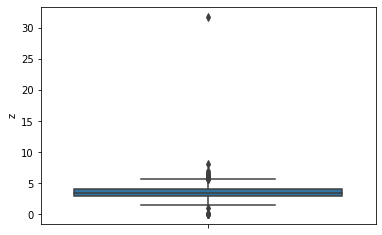

In [37]:
# Plot a box plot for the column `z`
sns.boxplot(y=diamonds_history.z)

In [38]:
# Check the outlier (z > 30)
diamonds_history[diamonds_history.z_calc > 30]

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,clarity_num,z_calc
43876,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.8,3,6,5,31.8


In [39]:
# Estimate value for `z`
diamonds_history['z_calc'] = [diamonds_history.iloc[index, 4] * np.mean([diamonds_history.iloc[index, 7], 
                                                                         diamonds_history.iloc[index, 8]]) / 100 
                              if (diamonds_history.iloc[index, 9] == 0) | (diamonds_history.iloc[index, 9] > 30)
                              else diamonds_history.iloc[index, 9] 
                              for index in diamonds_history.index]

# Check the result
diamonds_history

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,clarity_num,z_calc
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,6,3,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,6,5,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,2,4,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,1,2,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,3,1,6,2.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48928,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,4,7,3,3.58
48929,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,5,7,3,3.50
48930,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2,7,3,3.61
48931,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3,7,3,3.56


In [40]:
# Check the outlier (z > 30)
diamonds_history[diamonds_history.z > 30]

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,clarity_num,z_calc
43876,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.8,3,6,5,3.17343


# Fifth Linear Regression

## Linear Regresion Model

In [41]:
# Instance the model
model = LinearRegression()

X = diamonds_history[['carat', 'cut_num', 'color_num', 'clarity_num', 'table', 'x', 'y', 'z_calc']]
y = diamonds_history['price']

# Performe the model
model.fit(X, y)

# Predict
rick_predicted = model.predict(rick_diamonds[['carat', 'cut_num', 'color_num', 'clarity_num', 'table', 'x', 'y', 'z']])

# Create a new dataset
rick_final = raw_rick_diamonds.copy()
rick_final['price_predicted'] = rick_predicted
rick_final

# Export the dataset
rick_final.to_csv('LG-price-predicted.csv', index=False)

## Metric

> RMSE = 1230

> R² = 90.40%

# Exploratory Data Analysis (EDA)

## Check y

<AxesSubplot:ylabel='y'>

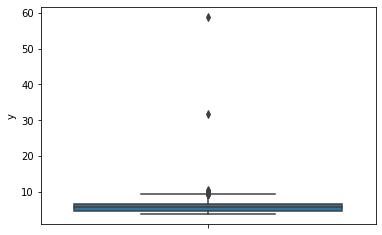

In [42]:
# Plot a box plot for the column `y`
sns.boxplot(y=diamonds_history.y)

In [43]:
# Check outliers
diamonds_history[diamonds_history.y > 20]

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,clarity_num,z_calc
21825,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06,4,3,2,8.06
44597,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12,5,6,5,5.12


In [44]:
# Estimate `y`
diamonds_history['y_calc'] = [((2 * diamonds_history.iloc[index, 13]) - (diamonds_history.iloc[index, 7] * (diamonds_history.iloc[index, 4] / 100))) / (diamonds_history.iloc[index, 4] / 100)
                              if diamonds_history.iloc[index, 8] > 20
                              else diamonds_history.iloc[index, 8] 
                              for index in diamonds_history.index]

# Check the result
diamonds_history

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,clarity_num,z_calc,y_calc
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,6,3,2.31,3.84
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,6,5,2.31,4.07
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,2,4,2.63,4.23
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,1,2,2.75,4.35
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,3,1,6,2.48,3.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48928,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,4,7,3,3.58,5.73
48929,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,5,7,3,3.50,5.76
48930,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2,7,3,3.61,5.75
48931,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3,7,3,3.56,5.68


In [45]:
# Check outliers
diamonds_history[diamonds_history.y > 20]

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,clarity_num,z_calc,y_calc
21825,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06,4,3,2,8.06,19.278421
44597,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12,5,6,5,5.12,11.419579


# Sixth Linear Regression

## Linear Regression Model

In [46]:
# Instance the model
model = LinearRegression()

X = diamonds_history[['carat', 'cut_num', 'color_num', 'clarity_num', 'table', 'x', 'y_calc', 'z_calc']]
y = diamonds_history['price']

# Performe the model
model.fit(X, y)

# Predict
rick_predicted = model.predict(rick_diamonds[['carat', 'cut_num', 'color_num', 'clarity_num', 'table', 'x', 'y', 'z']])

# Create a new dataset
rick_final = raw_rick_diamonds.copy()
rick_final['price_predicted'] = rick_predicted
rick_final

# Export the dataset
rick_final.to_csv('LG-price-predicted.csv', index=False)

## Metric

> RMSE = 1227

> R² = 90.45%

# Exploratory Data Analysis (EDA)

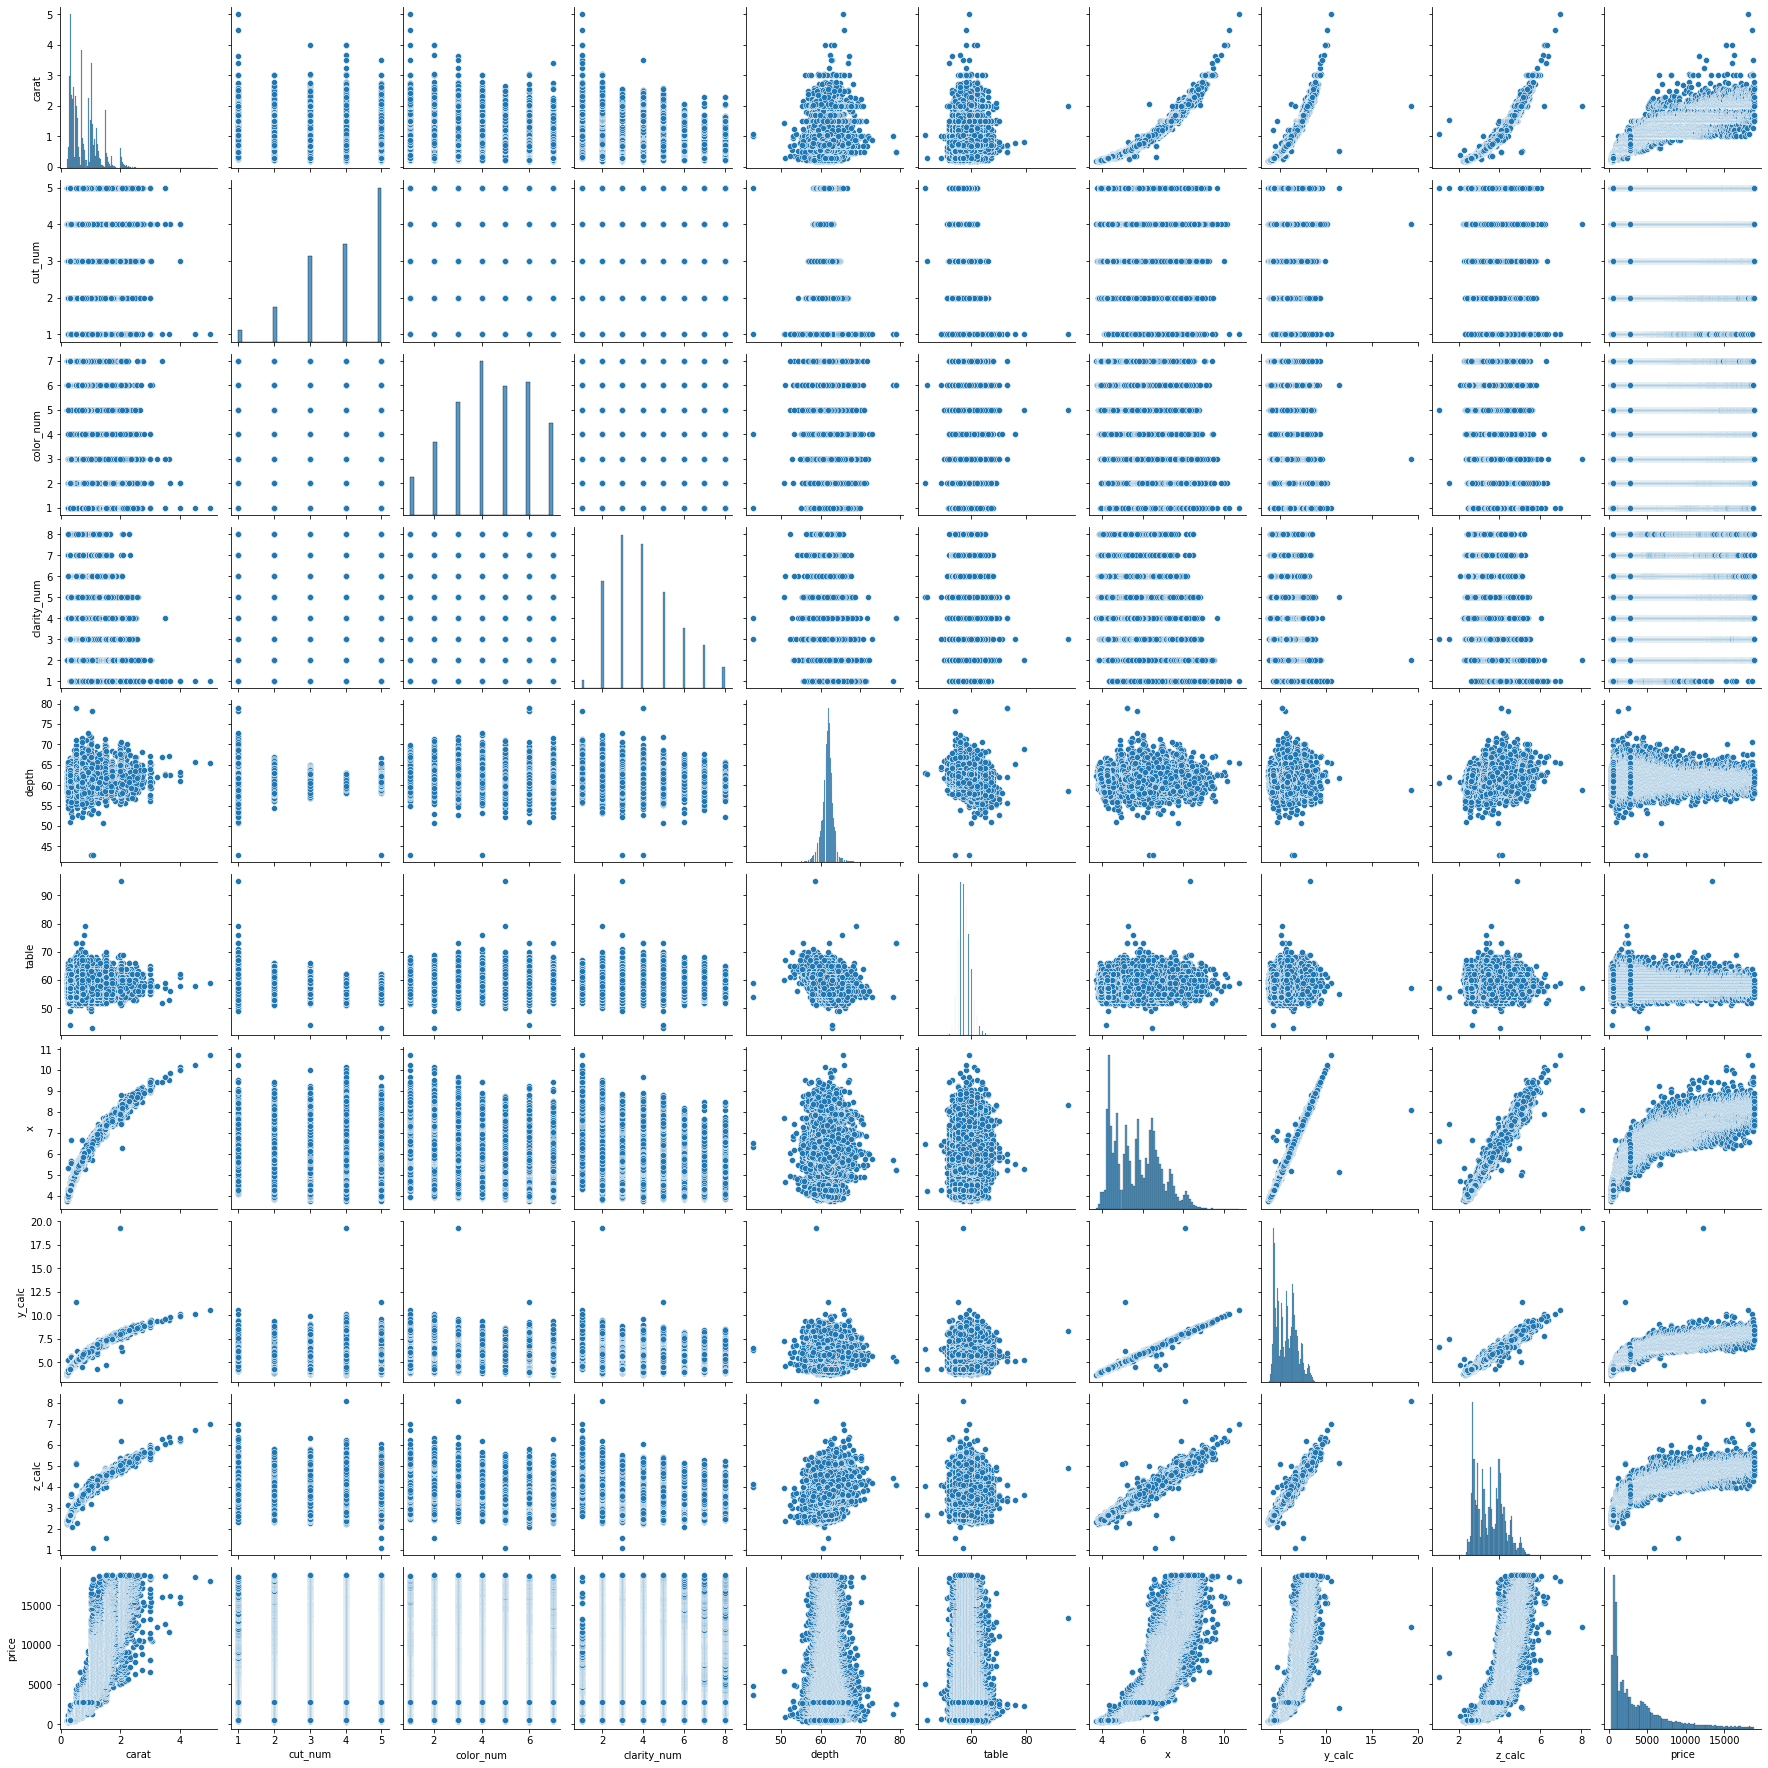

In [47]:
# Plot
sns.pairplot(diamonds_history[['carat', 'cut_num', 'color_num', 'clarity_num', 'depth', 'table', 'x', 'y_calc', 'z_calc', 'price']])

Checking the relationship between the `price` with the variables `carat`, `x`, `y` and `z`, it is clear that the relationship is **not linear**.

# Seventh Linear Regression

## Linear Regression Model, transforming dataset using **ln**

In [48]:
# Check Rick's dataset statistics summary
rick_diamonds.describe()

,carat,depth,table,x,y,z,cut_num,color_num,clarity_num
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,0.799144,61.724680,57.516140,5.735516,5.736410,3.539576,3.881400,4.39160,4.007600
std,0.472936,1.457691,2.244019,1.120300,1.110345,0.694733,1.116774,1.71337,1.662196
min,0.200000,44.000000,50.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000
25%,0.400000,61.000000,56.000000,4.720000,4.720000,2.910000,3.000000,3.00000,3.000000
50%,0.710000,61.800000,57.000000,5.710000,5.720000,3.530000,4.000000,4.00000,4.000000
75%,1.040000,62.500000,59.000000,6.530000,6.520000,4.032500,5.000000,6.00000,5.000000
max,4.130000,73.600000,70.000000,10.000000,9.850000,6.430000,5.000000,7.00000,8.000000


Since there are values equal to zero in the columns `x`, `y` and `z`, it will not be possible to use the ln. Therefore, instead of using these 3 variables, we will use the `depth` for the analysis.

In [49]:
# Instance the model
model = LinearRegression()

X = diamonds_history[['carat', 'cut_num', 'color_num', 'clarity_num', 'table', 'depth']]
y = diamonds_history['price']

# Convert to log
X_ln = np.log(X)
y_ln = np.log(y)

# Performe the model
model.fit(X_ln, y_ln)

# Predict
rick = rick_diamonds[['carat', 'cut_num', 'color_num', 'clarity_num', 'table', 'depth']]
rick_ln = np.log(rick)
rick_predicted_ln = model.predict(rick_ln)

# Convert back
rick_predicted = np.exp(rick_predicted_ln)

# Create a new dataset
rick_final = raw_rick_diamonds.copy()
rick_final['price_predicted'] = rick_predicted
rick_final

# Export the dataset
rick_final.to_csv('LG-price-predicted.csv', index=False)

## Metric

> RMSE:853

> R²: 95.38%

## Predicted Prices

In [50]:
rick_final

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2850.345298
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,854.339547
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,1457.704665
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,7206.398695
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,18298.028657
...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,446.493949
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,1965.997558
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,4868.354813
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,828.863978
